<a href="https://colab.research.google.com/github/tophervt/StockChart/blob/main/Stock3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

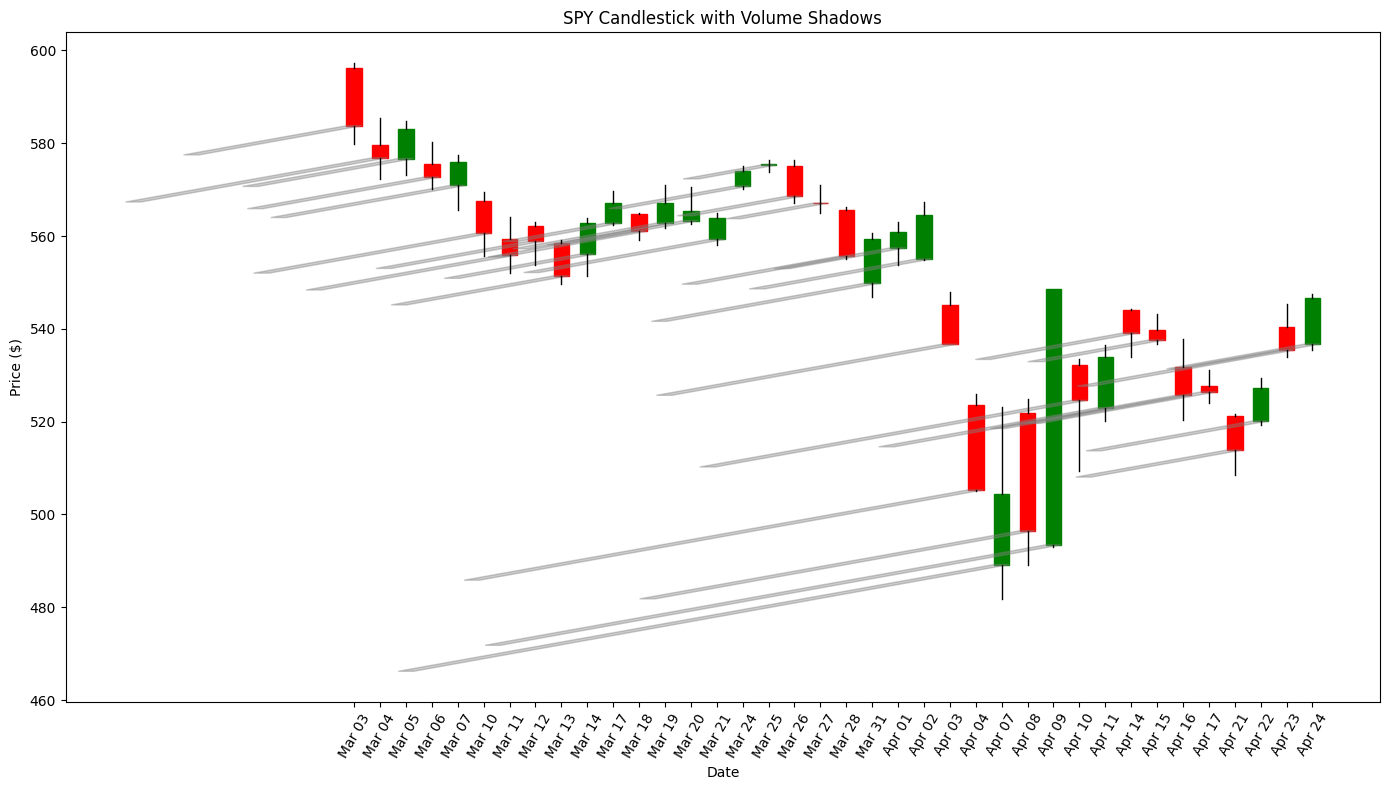

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from datetime import datetime

df = pd.read_csv("SPY.csv", parse_dates=['Date'])

cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


df['Volume'] = df['Volume'].astype(str).str.replace(',', '')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

df['Date'] = pd.to_datetime(df['Date'])

max_volume = df['Volume'].max()
min_volume = df['Volume'].min()
df['shadow_length'] = 0.3 + (df['Volume'] - min_volume) / (max_volume - min_volume) * 2

fig, ax = plt.subplots(figsize=(14, 8))
candlestick_width = 0.6

for i, row in df.iterrows():
    x = i
    color = 'green' if row['Close'] >= row['Open'] else 'red'

    ax.add_patch(
        patches.Rectangle(
            (x - candlestick_width/2, min(row['Open'], row['Close'])),
            candlestick_width,
            abs(row['Close'] - row['Open']),
            color=color
        )
    )
    # Lower wick
    ax.plot([x, x], [row['Low'], min(row['Open'], row['Close'])], color='black', linewidth=1)

    # Upper wick
    ax.plot([x, x], [row['High'], max(row['Open'], row['Close'])], color='black', linewidth=1)

    # Volume shadow
    shadow_length = row['shadow_length'] * 10  # You can tweak this
    candle_bottom = min(row['Open'], row['Close'])

    # Define shadow angled back left
    polygon = patches.Polygon(
        [
            (x - candlestick_width/2, candle_bottom),
            (x + candlestick_width/2, candle_bottom),
            (x + candlestick_width/2 - shadow_length, candle_bottom - shadow_length),
            (x - candlestick_width/2 - shadow_length, candle_bottom - shadow_length),
        ],
        closed=True,
        color='gray',
        alpha=0.4
    )
    ax.add_patch(polygon)

ax.set_xticks(range(len(df)))
ax.set_xticklabels(df['Date'].dt.strftime('%b %d'), rotation=60)

ax.set_title('SPY Candlestick with Volume Shadows')
ax.set_ylabel('Price ($)')
ax.set_xlabel('Date')
plt.tight_layout()
plt.show()

fig.savefig('candlestick_chart.png', dpi=300, bbox_inches='tight')

